In [2]:
import numpy as np
import psycopg2
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    context='paper',
    font_scale=8/8.8,
    style='ticks',
    color_codes=True,
    rc={'legend.frameon': False})

plt.rcParams['svg.fonttype'] = 'none'

%matplotlib inline

In [3]:
benchmark = pd.read_csv('mae-benchmark.csv')
benchmark = benchmark.melt(id_vars=['LOT/BS'], var_name='solvation model', value_name='MAE (V)')
benchmark['LOT/BS'] = benchmark['LOT/BS'].str.replace('⍵', r'$\omega$')

In [10]:
lr_redox = pd.read_csv('20220522_learning_curve_data_redox.csv')
lr_stab = pd.read_csv('20220522_learning_curve_data_spin_bv.csv')
redox_test = pd.read_csv('test-set-redox-dft-vs-ml.csv.gz', index_col=0)

array([[0.6645668 , 0.55669445, 0.45551165, 0.35618714, 0.25090352,
        0.17842073, 0.12713665, 0.08791429, 0.06904311, 0.04862623],
       [0.69172197, 0.62956572, 0.4896805 , 0.37987038, 0.28004725,
        0.19781251, 0.14289052, 0.10327042, 0.07313196, 0.05575865]])

In [46]:
np.abs(np.vstack([
    lr_redox[['mae_ie_1', 'mae_ie_2', 'mae_ie_3']].min(1).values,
    lr_redox[['mae_ie_1', 'mae_ie_2', 'mae_ie_3']].max(1).values,
]) -  lr_redox['avg_ie'].values)

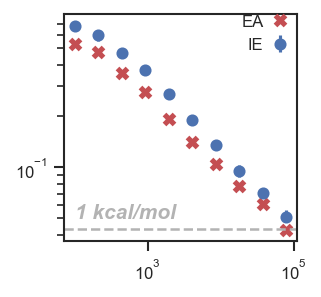

In [ ]:
fig = plt.figure(figsize=(2,2), dpi=150)
ax2 = fig.add_subplot(111)

ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.errorbar(lr_redox['num_train'], lr_redox['avg_ie'], yerr=, marker='o', label='IE', lw=0, elinewidth=1.5)
ax2.plot(lr_redox['num_train'], lr_redox['avg_ea'], 'x', color='r', markeredgewidth=2.5, label='EA')
ax2.axhline(0.043, ls='--', color='.7')
ax2.text(lr_redox['num_train'].min(), 0.05, '1 kcal/mol', color='.7', style='italic', weight='bold')
ax2.legend(loc='upper right', markerfirst=False, borderpad=0, borderaxespad=0, handletextpad=0, handlelength=2)


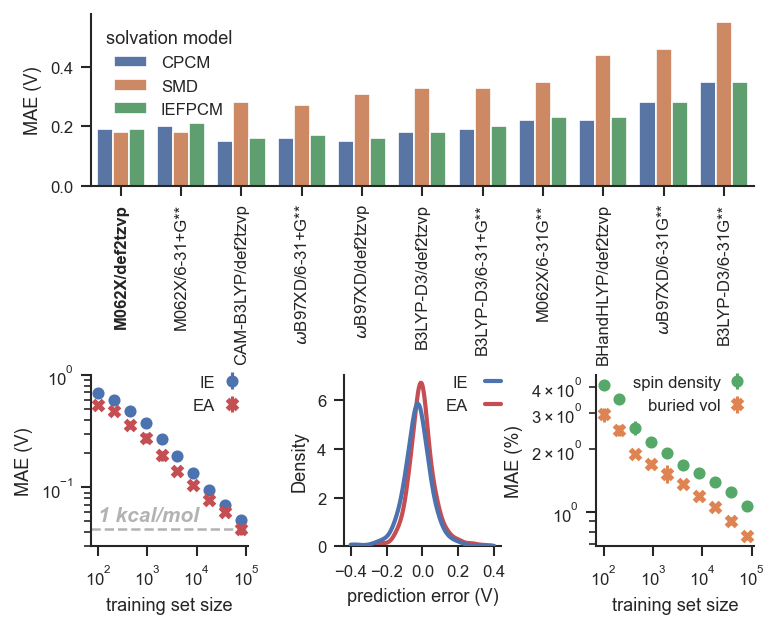

In [55]:
fig = plt.figure(figsize=(5,4), dpi=150)
gs = fig.add_gridspec(2, 3)

ax = fig.add_subplot(gs[0, :])
sns.barplot(x='LOT/BS', hue='solvation model', y='MAE (V)', data=benchmark, ax=ax,
            order=benchmark.groupby('LOT/BS')['MAE (V)'].mean().sort_values().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
label = ax.get_xticklabels()[0]
label.set_fontweight('bold')
ax.set_xlabel(None)


ax2 = fig.add_subplot(gs[1, 0])
ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.errorbar(lr_redox['num_train'], lr_redox['avg_ie'], yerr=lr_redox['sd_ie'], label='IE', marker='o', lw=0, elinewidth=1.5)
ax2.errorbar(lr_redox['num_train'], lr_redox['avg_ea'], yerr=lr_redox['sd_ea'], marker='x', color='r', markeredgewidth=2.5, label='EA', lw=0, elinewidth=1.5)
ax2.axhline(0.043, ls='--', color='.7')
ax2.text(lr_redox['num_train'].min(), 0.05, '1 kcal/mol', color='.7', style='italic', weight='bold')
ax2.legend(loc='upper right', markerfirst=False, borderpad=0, borderaxespad=0, handletextpad=0, handlelength=2)

ax2.set_ylabel('MAE (V)')
ax2.set_ylim([.03, 1.])
ax2.set_xticks([100, 1000, 10000, 100000])
ax2.set_xlabel('training set size')

ax4 = fig.add_subplot(gs[1, 1])
sns.kdeplot(redox_test['pred ionization energy'] - redox_test['ionization energy'], clip=[-.4, .4], ax=ax4, color='b', label='IE', lw=2, zorder=5)
sns.kdeplot(redox_test['pred electron affinity'] - redox_test['electron affinity'], clip=[-.4, .4], ax=ax4, color='r', label='EA', lw=2)
ax4.legend(loc='upper right', markerfirst=False, borderpad=0, borderaxespad=0, handletextpad=1, handlelength=1)
ax4.set_xlabel('prediction error (V)')
ax4.set_xticks([-.4, -.2, 0., .2, .4])


ax3 = fig.add_subplot(gs[1, 2])
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.errorbar(lr_stab['num_train'], lr_stab['avg_spin'] * 100, yerr=lr_stab['sd_spin'] * 100, marker='o', color=sns.color_palette()[2], label='spin density', lw=0, elinewidth=1.5)
ax3.errorbar(lr_stab['num_train'], lr_stab['avg_bv'], yerr=lr_stab['sd_bv'], marker='x', color=sns.color_palette()[1], markeredgewidth=2.5, label='buried vol', lw=0, elinewidth=1.5)
ax3.legend(loc='upper right', markerfirst=False, borderpad=0, borderaxespad=0, handletextpad=0, handlelength=2)
ax3.set_ylabel('MAE (%)')
ax3.set_xticks([100, 1000, 10000, 100000])
ax3.set_xlabel('training set size')



sns.despine()
fig.tight_layout(pad=0)
plt.savefig('fig2_surrogate_model_err.svg')